# ggplot2 και seaborn Β'
### Many times it is more practical to make our graphs with a higher level library than matplotlib.

### Two such libraries are:[ggplot2](https://ggplot2.tidyverse.org/), which in Python has been ported as [plotnine](https://plotnine.readthedocs.io/en/stable/). [seaborn](https://seaborn.pydata.org/)


In [1]:
import pandas as pd
from plotnine import *
import seaborn as sns

* Let's deal with a dataset, which is included in ggplot2.

* These data refer to diamond characteristics and prices.

In [2]:
from plotnine.data import diamonds
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


* We start by making a bar chart based on the cut of the diamonds.

* The bar graph is generated with the `geom_bar()` geometry.

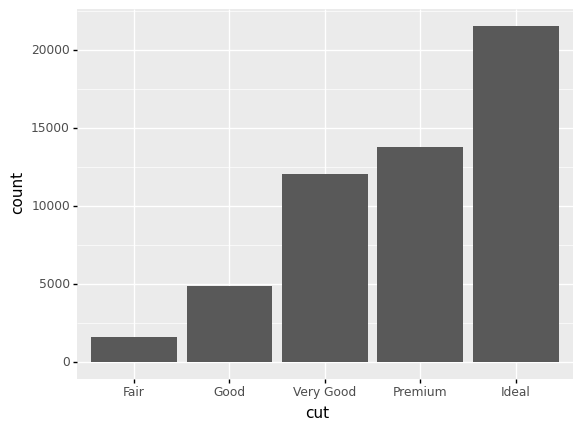

<ggplot: (335528509)>

In [3]:
ggplot(data=diamonds) + \
    geom_bar(mapping=aes(x='cut'))

* The geometry `geom_bar()` counts the number of observations in each category.

* So it implements some kind of statistical metric and we can get the same result by giving `stat_count()`.

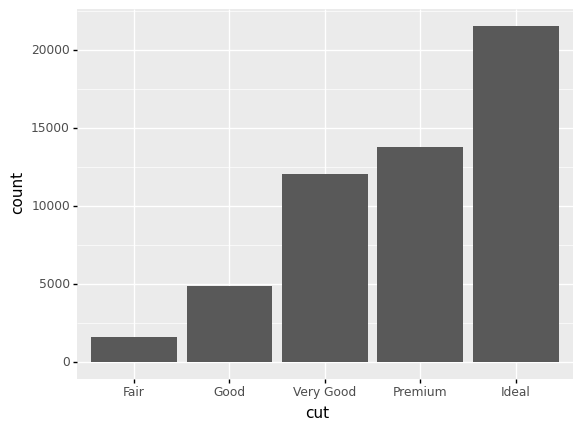

<ggplot: (335633794)>

In [4]:
ggplot(data=diamonds) + \
    stat_count(mapping=aes(x='cut'))

* In seaborn respectively:

<AxesSubplot:xlabel='cut', ylabel='count'>

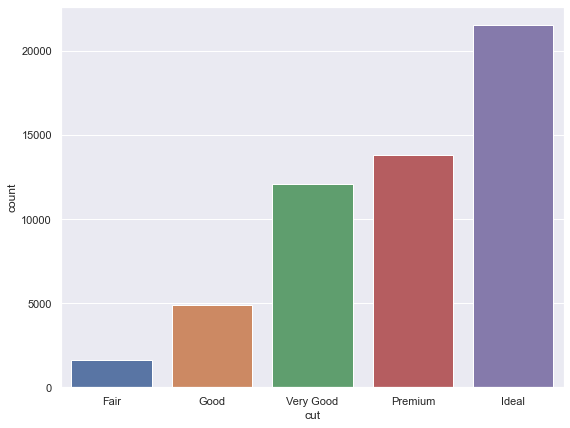

In [5]:
sns.set_style('dark')
sns.set(rc={'figure.figsize':(9, 7)})
sns.countplot(x='cut', data=diamonds)

* Sometimes our data comes already counted in categories, such as:

In [6]:
counted = diamonds.groupby('cut').size().to_frame(name='freq').reset_index()
counted

,cut,freq
0,Fair,1610
1,Good,4906
2,Very Good,12082
3,Premium,13791
4,Ideal,21551


* To plot our data in a bar graph when it comes in this format, we must declare the statistical metric to be `identity'.

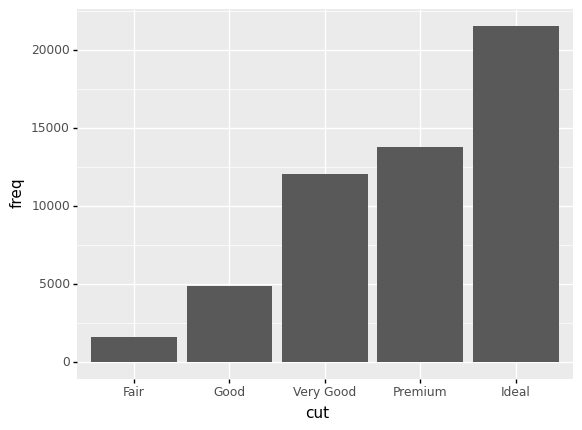

<ggplot: (335697719)>

In [7]:
ggplot(data=counted) + \
    geom_bar(mapping=aes(x='cut', y='freq'), stat="identity")

* And with seaborn:

<AxesSubplot:xlabel='cut', ylabel='freq'>

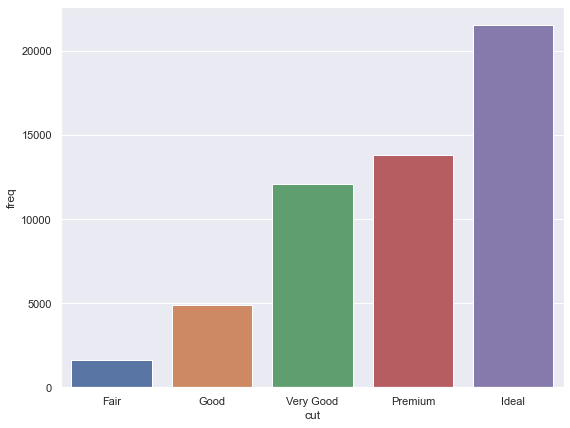

In [8]:
sns.barplot(x='cut', y='freq', data=counted)

* If we want to get *percentages* instead of absolute numbers in ggplot2, we will give:

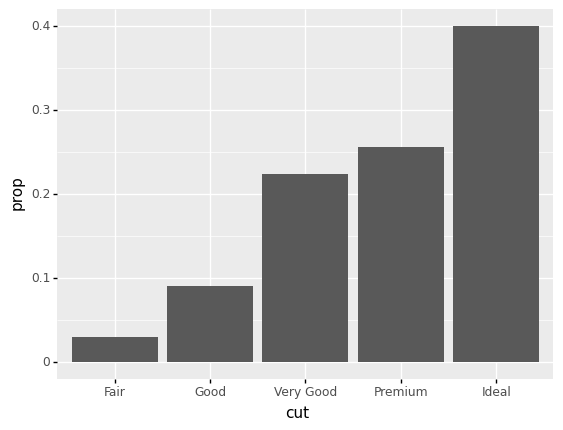

<ggplot: (335760174)>

In [9]:
ggplot(data=diamonds) + \
    geom_bar(mapping=aes(x='cut', y="stat(prop)", group=1))

* Something interesting is that in ggplot2 we can plot any statistical metric via `stat_summary()` and giving the appropriate parameters.

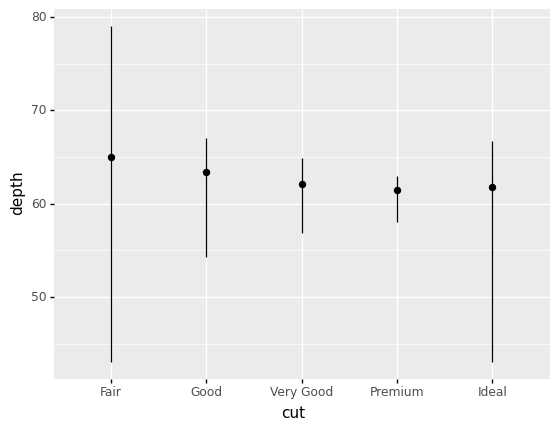

<ggplot: (335796270)>

In [10]:
import numpy as np

ggplot(data = diamonds) + \
    stat_summary(mapping=aes(x='cut', y='depth'),
        fun_ymin=np.min, fun_ymax=np.max, fun_y=np.median)

* Let's go back to bar charts, where we can add an extra dimension by using different colors.

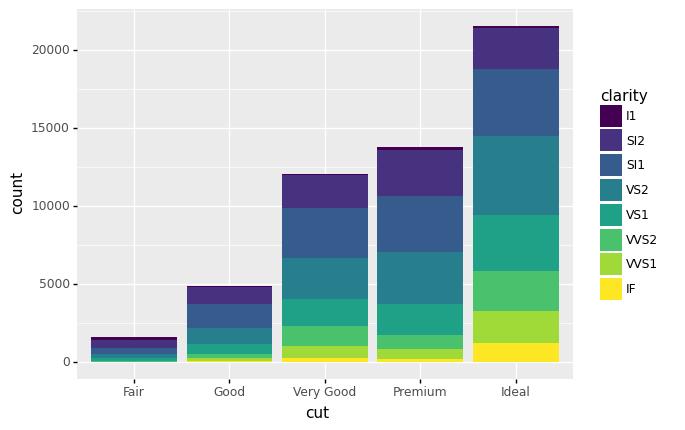

<ggplot: (335758394)>

In [11]:
ggplot(data=diamonds) +  \
    geom_bar(mapping = aes(x='cut', fill='clarity'))

* We can get the same result by giving `position='stack'`.

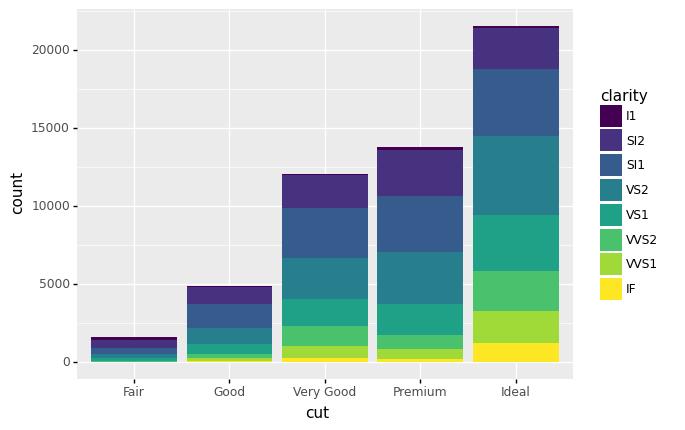

<ggplot: (335900886)>

In [12]:
ggplot(data=diamonds) +  \
    geom_bar(mapping = aes(x='cut', fill='clarity'), position='stack')

* If we alternatively use `position='fill'`, the colors will sum to one.

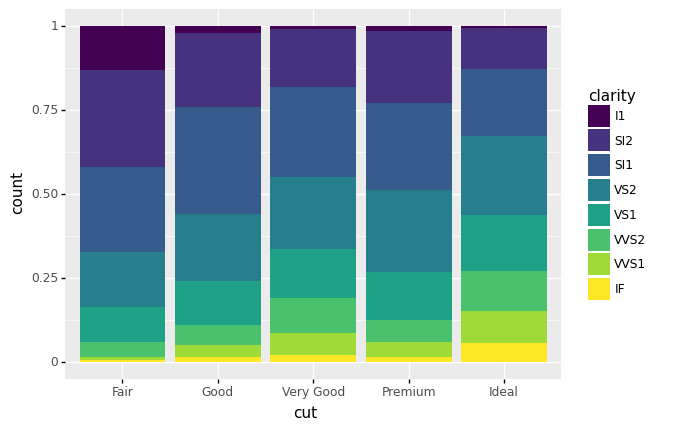

<ggplot: (335946734)>

In [13]:
ggplot(data=diamonds) + \
    geom_bar(mapping=aes(x='cut', fill='clarity'), position='fill')

* If we prefer the bars to enter side by side, we can give `position='dodge'`.

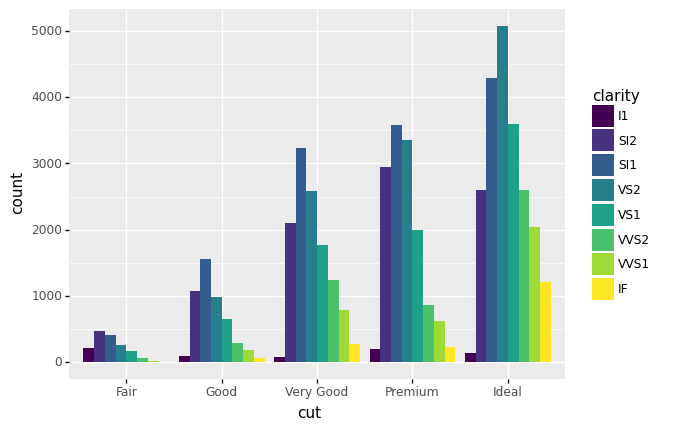

<ggplot: (335992787)>

In [14]:
ggplot(data=diamonds) + \
    geom_bar(mapping=aes(x='cut', fill='clarity'), position='dodge')

* We can get the same result in seaborn with `countplot()`.

<AxesSubplot:xlabel='cut', ylabel='count'>

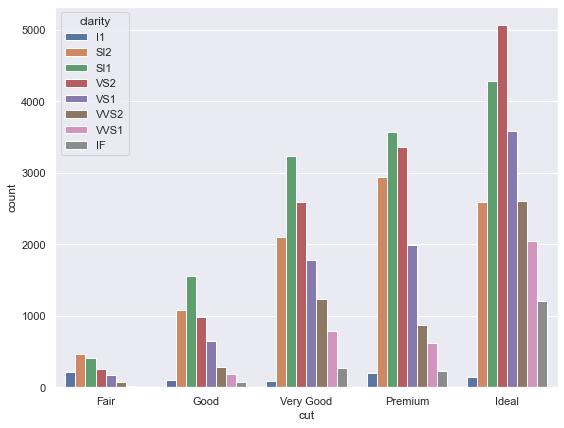

In [15]:
sns.countplot(x='cut', hue='clarity', data=diamonds)

* Now let's go back a bit to the car data.

* Yes, this time we will use the small data set.

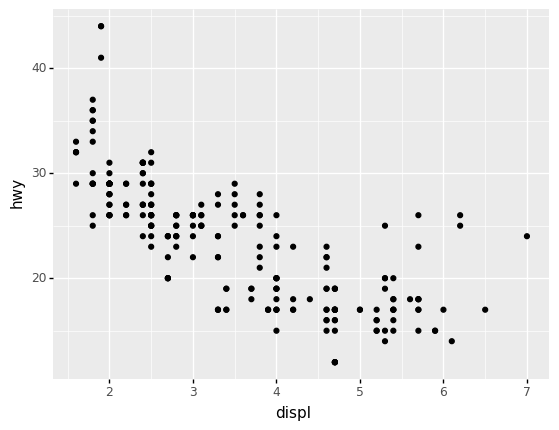

<ggplot: (336087878)>

In [16]:
from plotnine.data import mpg

ggplot(data = mpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'))

* To avoid cases where observations fall on top of each other, we can use the `position='jitter'` parameter.

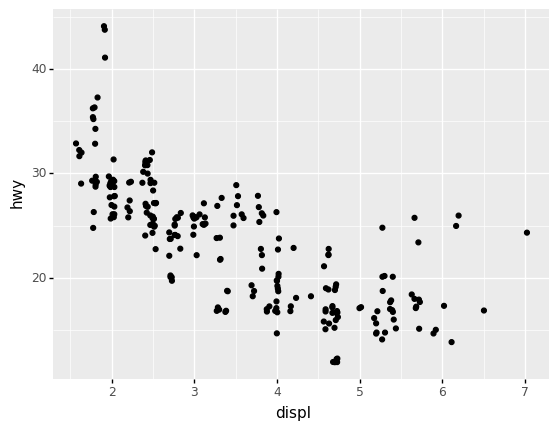

<ggplot: (336083770)>

In [17]:
ggplot(data = mpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'), position='jitter')

* To close, let's see the consumption by class through thecograms.

* We need to read the data again.

In [18]:
usecols = [
    'model',
    'make',
    'year', 
    'cylinders',
    'drive',
    'trany',
    'displ',
    'highway08',
    'city08',
    'fuelType',
    'VClass'
]

fmpg = pd.read_csv('vehicles.csv.zip', usecols=usecols)

In [19]:
fmpg

,city08,cylinders,displ,drive,fuelType,highway08,make,model,trany,VClass,year
0,19,4.0,2.0,Rear-Wheel Drive,Regular,25,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985
1,9,12.0,4.9,Rear-Wheel Drive,Regular,14,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985
2,23,4.0,2.2,Front-Wheel Drive,Regular,33,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
3,10,8.0,5.2,Rear-Wheel Drive,Regular,12,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985
4,17,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,23,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
...,...,...,...,...,...,...,...,...,...,...,...
44682,19,4.0,2.2,Front-Wheel Drive,Regular,26,Subaru,Legacy,Automatic 4-spd,Compact Cars,1993
44683,20,4.0,2.2,Front-Wheel Drive,Regular,28,Subaru,Legacy,Manual 5-spd,Compact Cars,1993
44684,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Automatic 4-spd,Compact Cars,1993
44685,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Manual 5-spd,Compact Cars,1993


* Rename the columns again:

In [20]:
fmpg.rename(columns={
        'highway08': 'hwy', 
        'city08': 'city',
        'fuelType': 'fl',
        'VClass': 'class',
        'trany': 'trans',
        'cylinders': 'cyl',
        'drive': 'drv'
    }, inplace=True)
fmpg

,city,cyl,displ,drv,fl,hwy,make,model,trans,class,year
0,19,4.0,2.0,Rear-Wheel Drive,Regular,25,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985
1,9,12.0,4.9,Rear-Wheel Drive,Regular,14,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985
2,23,4.0,2.2,Front-Wheel Drive,Regular,33,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
3,10,8.0,5.2,Rear-Wheel Drive,Regular,12,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985
4,17,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,23,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
...,...,...,...,...,...,...,...,...,...,...,...
44682,19,4.0,2.2,Front-Wheel Drive,Regular,26,Subaru,Legacy,Automatic 4-spd,Compact Cars,1993
44683,20,4.0,2.2,Front-Wheel Drive,Regular,28,Subaru,Legacy,Manual 5-spd,Compact Cars,1993
44684,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Automatic 4-spd,Compact Cars,1993
44685,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Manual 5-spd,Compact Cars,1993


* We add up the number of classes:

In [21]:
fmpg.loc[fmpg['class'].str.startswith('Small Pickup Trucks'), 'class'] = 'Small Pickup Trucks'
fmpg.loc[fmpg['class'].str.startswith('Standard Pickup Trucks'), 'class'] = 'Standard Pickup Trucks'
fmpg.loc[fmpg['class'].str.startswith('Special Purpose Vehicle'), 'class'] = 'Special Purpose Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Sport Utility Vehicle'), 'class'] = 'Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Small Sport Utility Vehicle'), 'class'] = 'Small Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Standard Sport Utility Vehicle'), 'class'] = 'Standard Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Minivan'), 'class'] = 'Minivan'
fmpg.loc[fmpg['class'].str.startswith('Vans'), 'class'] = 'Vans'

* Let's go to the graphs.

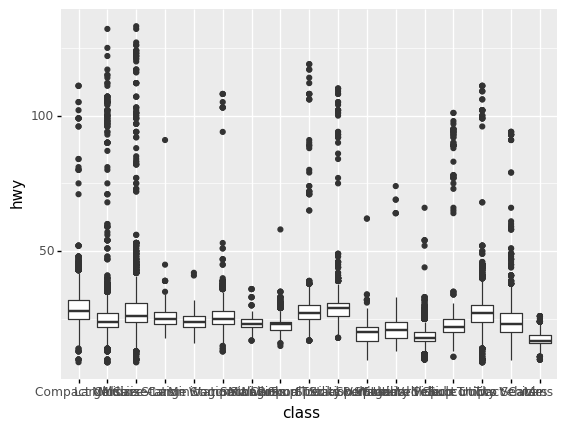

<ggplot: (335976714)>

In [22]:
ggplot(data=fmpg, mapping=aes(x='class', y='hwy')) + \
    geom_boxplot()

* Likewise in seaborn.

<AxesSubplot:xlabel='class', ylabel='hwy'>

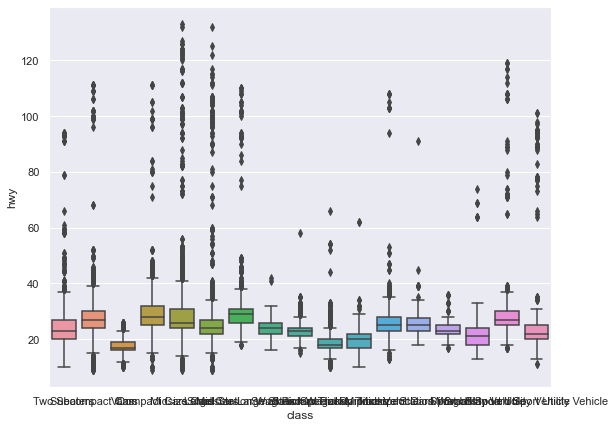

In [23]:
sns.boxplot(x="class", y="hwy", data=fmpg)

* To fix the mess with overlapping captions on the horizontal axis, just change the positions of the axes.

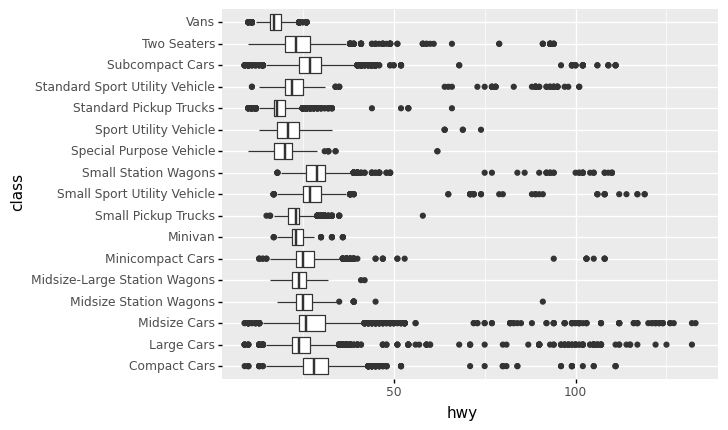

<ggplot: (336286504)>

In [24]:
ggplot(data=fmpg, mapping=aes(x='class', y='hwy')) + \
    geom_boxplot() + \
    coord_flip()

* Likewise with seaborn.

<AxesSubplot:xlabel='hwy', ylabel='class'>

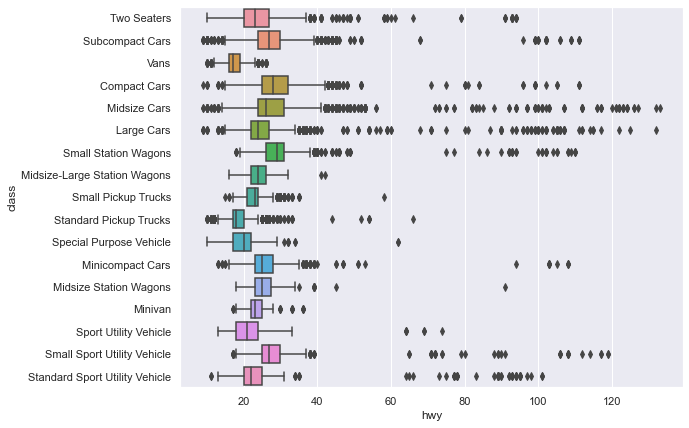

In [25]:
sns.boxplot(x="hwy", y="class", orient='h', data=fmpg)